In [26]:
from sklearn.model_selection import train_test_split
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot as plt

In [28]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("First 5 training labels: ", y_train[:5])

First 5 training labels:  [5 0 4 1 9]


In [29]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [30]:
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

In [31]:
image_size = 28*28
model = Sequential()

model.add(Dense(units=32, activation='sigmoid', input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=128, epochs=5, verbose=False, validation_split=.1)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)

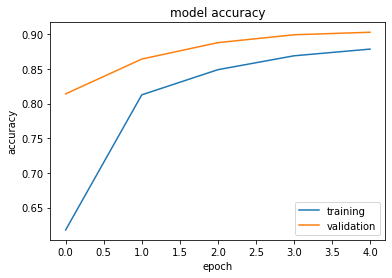

Test loss: 0.492
Test accuracy: 0.885


In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [40]:
def create_dense(layer_sizes):
    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='sigmoid', input_shape=(image_size,)))

    for s in layer_sizes[1:]:
        model.add(Dense(units = s, activation = 'sigmoid'))

    model.add(Dense(units=num_classes, activation='softmax'))
    return model

def evaluate(model, batch_size=128, epochs=5):
    model.summary()
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.1, verbose=False)
    loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_205 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_206 (Dense)            (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


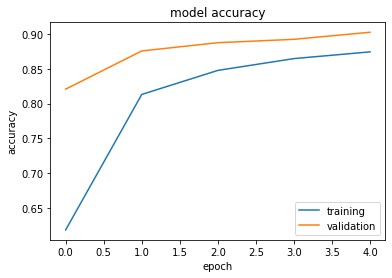


Test loss: 0.511
Test accuracy: 0.882
Model: "sequential_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_207 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_208 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_209 (Dense)            (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


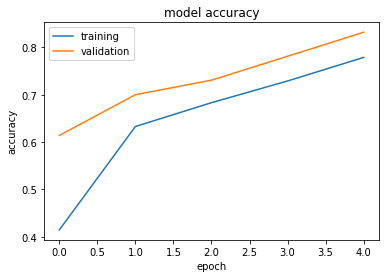


Test loss: 1.18
Test accuracy: 0.809
Model: "sequential_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_210 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_211 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_212 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_213 (Dense)            (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


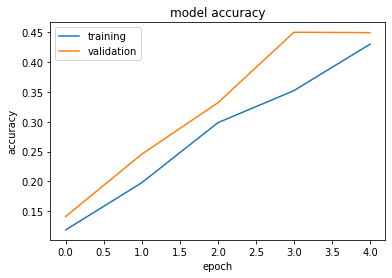


Test loss: 2.07
Test accuracy: 0.434
Model: "sequential_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_214 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_215 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_216 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_217 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_218 (Dense)            (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________


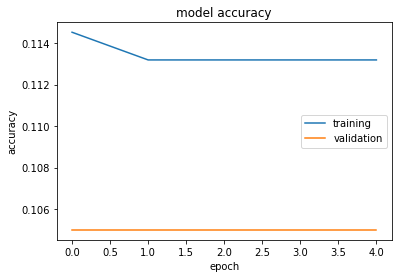


Test loss: 2.29
Test accuracy: 0.113


In [56]:
for layers in range(1, 5):
    model = create_dense([32] * layers)
    evaluate(model)

In [48]:
def create_dense_relu(layer_sizes):
    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='relu', input_shape=(image_size,)))

    for s in layer_sizes[1:]:
        model.add(Dense(units = s, activation = 'relu'))

    model.add(Dense(units=num_classes, activation='softmax'))
    return model
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_219 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_220 (Dense)            (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


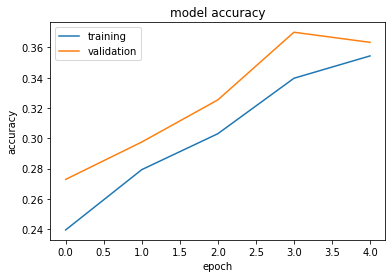


Test loss: 1.73
Test accuracy: 0.345
Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_221 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_222 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_223 (Dense)            (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


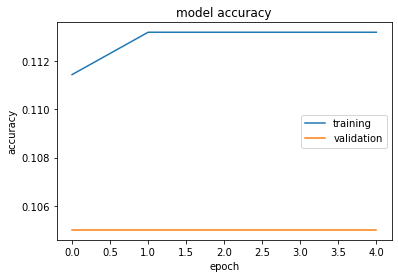


Test loss: 2.3
Test accuracy: 0.113
Model: "sequential_57"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_224 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_225 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_226 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_227 (Dense)            (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


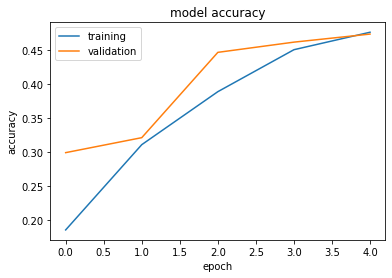


Test loss: 1.37
Test accuracy: 0.471
Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_228 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_229 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_230 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_231 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_232 (Dense)            (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________


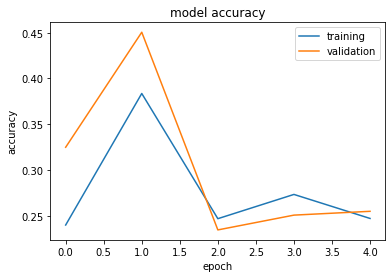


Test loss: 1.8
Test accuracy: 0.244


In [57]:
for layers in range(1, 5):
    model = create_dense_relu([32] * layers)
    evaluate(model)

Model: "sequential_67"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_281 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_282 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_283 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_284 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_285 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_286 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_287 (Dense)            (None, 10)              

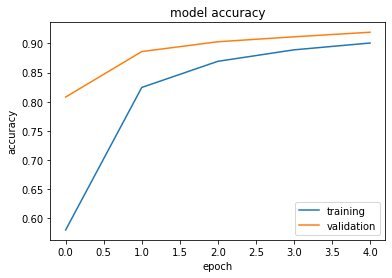


Test loss: 0.315
Test accuracy: 0.905
Model: "sequential_68"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_288 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_289 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_290 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_291 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_292 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_293 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_294 (Den

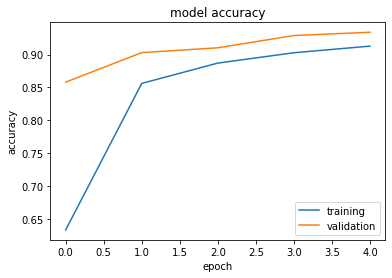


Test loss: 0.272
Test accuracy: 0.917


In [60]:
for layers in range(6, 8):
    model = create_dense_relu([32] * layers)
    evaluate(model)

In [50]:
def create_dense_tanh(layer_sizes):
    model = Sequential()
    model.add(Dense(layer_sizes[0], activation='tanh', input_shape=(image_size,)))

    for s in layer_sizes[1:]:
        model.add(Dense(units = s, activation = 'tanh'))

    model.add(Dense(units=num_classes, activation='softmax'))
    return model
    
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')
    plt.show()

    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

Model: "sequential_63"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_267 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_268 (Dense)            (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


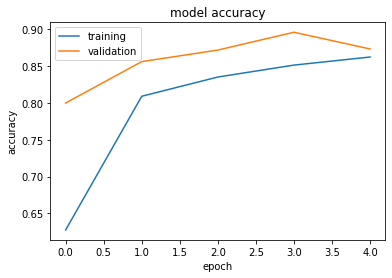


Test loss: 0.494
Test accuracy: 0.851
Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_269 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_270 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_271 (Dense)            (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


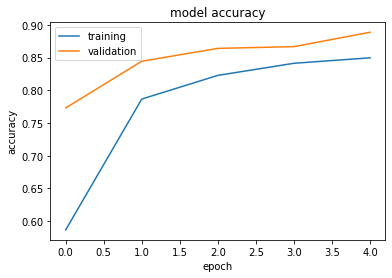


Test loss: 0.461
Test accuracy: 0.872
Model: "sequential_65"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_272 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_273 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_274 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_275 (Dense)            (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


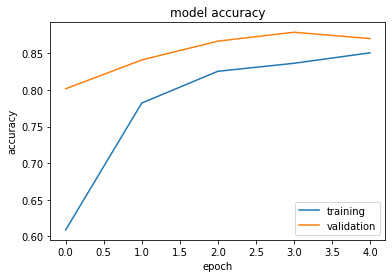


Test loss: 0.509
Test accuracy: 0.855
Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_276 (Dense)            (None, 32)                25120     
_________________________________________________________________
dense_277 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_278 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_279 (Dense)            (None, 32)                1056      
_________________________________________________________________
dense_280 (Dense)            (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________


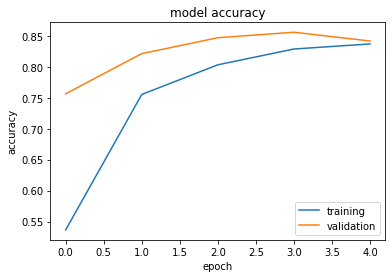


Test loss: 0.552
Test accuracy: 0.828


In [59]:
for layers in range(1, 5):
    model = create_dense_tanh([32] * layers)
    evaluate(model)